In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

df = train_df.append(test_df)
print(df.shape)
print(df.info())
print(df.tail())

(1309, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
None
     PassengerId  Survived  Pclass                          Name     Sex  \
413         1305       NaN       3            Spector, Mr. Woolf    male   
414         1306       NaN       1  Oliva y Ocana, Dona. Fermina  female  

In [5]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<AxesSubplot:>

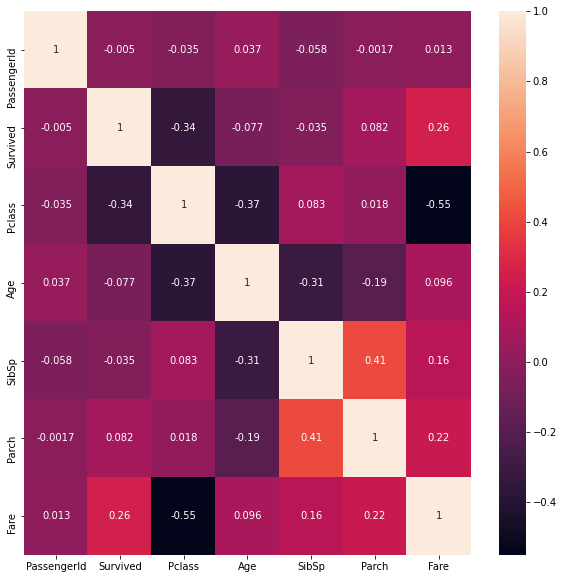

In [10]:
# 891번 train_df
# 892번 test
train_df = df.iloc[:891,:]
test_df = df.iloc[891:,:]

plt.figure(figsize=(10,10))
sns.heatmap(data=train_df.corr(), annot=True, fmt=".2g") #가공 전 원본 train으로 상관분석

In [11]:
X_train = train_df.drop("Survived", axis=1)             #학습용문제 : train 891개
y_train = train_df["Survived"]                          #학습용답안 : train 891개
X_test  = test_df
                                        
print(X_train[:2])
print(y_train[:2])
print(X_test[:2])

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   

      Sex   Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0    male  22.0      1      0  A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0   PC 17599  71.2833   C85        C  
0    0.0
1    1.0
Name: Survived, dtype: float64
   PassengerId  Survived  Pclass                              Name     Sex  \
0          892       NaN       3                  Kelly, Mr. James    male   
1          893       NaN       3  Wilkes, Mrs. James (Ellen Needs)  female   

    Age  SibSp  Parch  Ticket    Fare Cabin Embarked  
0  34.5      0      0  330911  7.8292   NaN        Q  
1  47.0      1      0  363272  7.0000   NaN        S  


In [12]:
df["Sex"] = df["Sex"].apply(lambda x: 0 if x == "female" else 1)
print(df["Sex"].head())

#C106 A51 5254 --> 글자1개만 추출  (문법공부)
df["Cabin2"] =  df["Cabin"].str[0:1]   #.str[0]

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64


In [17]:
df["Name2"] = df["Name"].str.extract("([A-Za-z]+)\.")
print("==============")
print(df["Name2"] )

dict = df.groupby(by=["Name2"])[["Name2","Age"]].mean().astype(np.int32).to_dict()
print(dict)
fill_mean_func = lambda gname: gname.fillna(dict['Age'][gname.name])
df = df.groupby('Name2').apply(fill_mean_func)

print("==============")
print(df.head())

0        Mr
0        Mr
1       Mrs
1       Mrs
2      Miss
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name2, Length: 1309, dtype: object
{'Age': {'Capt': 70, 'Col': 54, 'Countess': 33, 'Don': 40, 'Dona': 39, 'Dr': 43, 'Jonkheer': 38, 'Lady': 48, 'Major': 48, 'Master': 5, 'Miss': 21, 'Mlle': 24, 'Mme': 24, 'Mr': 32, 'Mrs': 36, 'Ms': 28, 'Rev': 41, 'Sir': 49}}
   PassengerId  Survived  Pclass  \
0            1       0.0       3   
0          892      32.0       3   
1            2       1.0       1   
1          893      36.0       3   
2            3       1.0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
0                                   Kelly, Mr. James    1  34.5      0      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
1                   Wilkes, Mrs. James (Ellen Needs)    0  47.

In [18]:
df["Age_cate"] = df["Age"].apply(lambda x : int(x//10))
df["Embarked"] = df["Embarked"].apply(lambda x: 1 if x == "C" else (2 if x == "Q" else 3))
df["SP"] = df["SibSp"] + df["Parch"]

df["Fare"] = df["Fare"].apply(lambda x : int(x//10))
df["Fare"] = pd.qcut( df["Fare"], 4, labels=False, duplicates="drop")
print("---", df["Fare"])

--- 0      0
0      0
1      2
1      0
2      0
      ..
886    0
887    1
888    1
889    1
890    0
Name: Fare, Length: 1309, dtype: int64


In [19]:
df = pd.get_dummies(data=df , columns=["Age_cate"], prefix = "OH_Age_cate")  #, drop_first = True
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1309 non-null   int64  
 1   Survived       1309 non-null   float64
 2   Pclass         1309 non-null   int64  
 3   Name           1309 non-null   object 
 4   Sex            1309 non-null   int64  
 5   Age            1309 non-null   float64
 6   SibSp          1309 non-null   int64  
 7   Parch          1309 non-null   int64  
 8   Ticket         1309 non-null   object 
 9   Fare           1309 non-null   int64  
 10  Cabin          1309 non-null   object 
 11  Embarked       1309 non-null   int64  
 12  Cabin2         1309 non-null   object 
 13  Name2          1309 non-null   object 
 14  SP             1309 non-null   int64  
 15  OH_Age_cate_0  1309 non-null   uint8  
 16  OH_Age_cate_1  1309 non-null   uint8  
 17  OH_Age_cate_2  1309 non-null   uint8  
 18  OH_Age_ca

In [20]:
replace_col = ["SibSp", "Parch","Name","Name2","Age"]    #SP=SibSp+Parch     Age_cate<--Name,Name2,Age
del_col = ["Ticket","Cabin","Cabin2"]  #Fare<--Pclass,SP   Embarked
replace_col = replace_col + del_col
df.drop(replace_col, axis=1, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1309 non-null   int64  
 1   Survived       1309 non-null   float64
 2   Pclass         1309 non-null   int64  
 3   Sex            1309 non-null   int64  
 4   Fare           1309 non-null   int64  
 5   Embarked       1309 non-null   int64  
 6   SP             1309 non-null   int64  
 7   OH_Age_cate_0  1309 non-null   uint8  
 8   OH_Age_cate_1  1309 non-null   uint8  
 9   OH_Age_cate_2  1309 non-null   uint8  
 10  OH_Age_cate_3  1309 non-null   uint8  
 11  OH_Age_cate_4  1309 non-null   uint8  
 12  OH_Age_cate_5  1309 non-null   uint8  
 13  OH_Age_cate_6  1309 non-null   uint8  
 14  OH_Age_cate_7  1309 non-null   uint8  
 15  OH_Age_cate_8  1309 non-null   uint8  
dtypes: float64(1), int64(6), uint8(9)
memory usage: 93.3 KB
None


In [22]:
train_df = df[df['PassengerId'] <= 891].copy()
test_df = df[df['PassengerId'] > 891].copy()

train_df.drop("PassengerId", axis=1, inplace=True)
test_df.drop("PassengerId", axis=1, inplace=True)

X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]
X_test  = test_df.drop("Survived", axis=1)

print(X_train.shape,  y_train.shape, X_test.shape)
print(X_train.head())
print(X_test.head())
print(y_train)

(891, 14) (891,) (418, 14)
   Pclass  Sex  Fare  Embarked  SP  OH_Age_cate_0  OH_Age_cate_1  \
0       3    1     0         3   1              0              0   
1       1    0     2         1   1              0              0   
2       3    0     0         3   0              0              0   
3       1    0     2         3   1              0              0   
4       3    1     0         3   0              0              0   

   OH_Age_cate_2  OH_Age_cate_3  OH_Age_cate_4  OH_Age_cate_5  OH_Age_cate_6  \
0              1              0              0              0              0   
1              0              1              0              0              0   
2              1              0              0              0              0   
3              0              1              0              0              0   
4              0              1              0              0              0   

   OH_Age_cate_7  OH_Age_cate_8  
0              0              0  
1              

<AxesSubplot:>

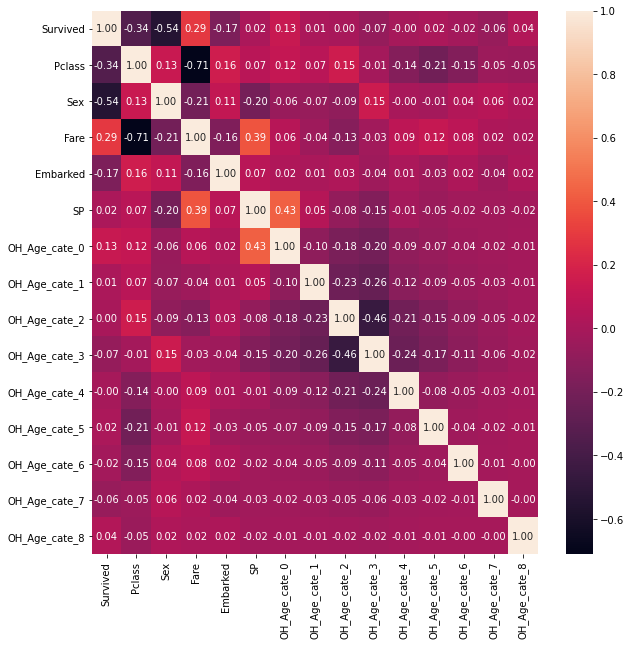

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(data=train_df.corr(), annot=True, fmt=".2f") #가공이 끝난 train으로 상관분석
#plt.show()

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [25]:
dt_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier()

# fit : 학습하다
rf_model.fit(X_train, y_train)
# predict : 시험
y_pred = rf_model.predict(X_test).astype(np.int32)

In [26]:
my_hyper_param = {  "n_estimators"     :[100, 300] ,
                    "max_depth"        :[3,5,7,9],
                    "min_samples_leaf" :[1,3,5],
                    "random_state"     :[121,]
                 }


from sklearn.model_selection import GridSearchCV
gcv_model = GridSearchCV(rf_model, param_grid=my_hyper_param, scoring="accuracy", refit=True, cv=5, verbose=0)

In [27]:
gcv_model.fit(X_train, y_train)
# predict : 시험
print("best_estimator_", gcv_model.best_estimator_)
print("best_params_",    gcv_model.best_params_)
print("best_score_" ,    gcv_model.best_score_)
y_pred = gcv_model.predict(X_test).astype(np.int32)
print(y_pred)

best_estimator_ RandomForestClassifier(max_depth=5, n_estimators=300, random_state=121)
best_params_ {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 300, 'random_state': 121}
best_score_ 0.8260561170045821
[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0

In [28]:
sub_df = pd.read_csv("gender_submission.csv")
mydic = {"PassengerId": sub_df["PassengerId"],
         "Survived" : y_pred
         }
sub_df = pd.DataFrame(mydic, index=None)
#sub_df.set_index('PassengerId', inplace=True)
print(sub_df.head())
sub_df.to_csv("gender_submission22.csv", index=None)

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0
